In [58]:
# importing required libraries
import os
from os import listdir

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab.patches import cv2_imshow

from skimage.filters import threshold_otsu, sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import clear_border, mark_boundaries
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import io, color,feature
from skimage import data, filters, measure, morphology

import pandas as pd
import numpy as np


# skimage.segmentation.felzenszwalb

ImportError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Working with the image coordinates:**

Observe the (x,y) location of the rings present in the displayed image.
Draw bounding boxes on top of these rings.

Display the image with bounding boxes.


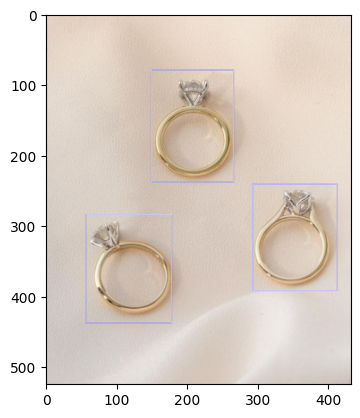

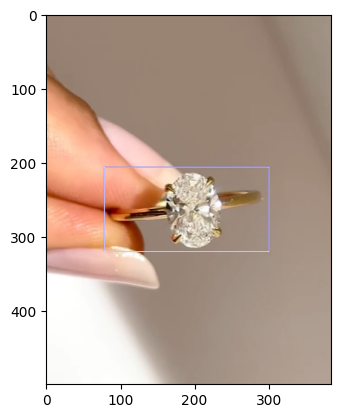

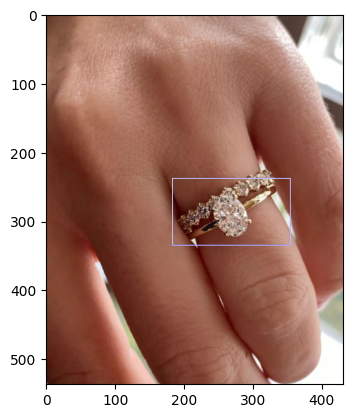

In [4]:
data_path = "/content/drive/MyDrive/Jahnavi Jaddi/Week 1/Ring_sample_data"
for images in os.listdir(data_path):
  if (images.endswith(".PNG")):
        # print(images)
        img=io.imread(data_path+"/"+images)
        file=data_path+"/"+images.replace("PNG","txt")
        fl = open(file, 'r')
        data = fl.readlines()
        fl.close()
        dh, dw, _ = img.shape
        for dt in data:

            # Split string to float
            _, x, y, w, h = map(float, dt.split(' '))

            l = int((x - w / 2) * dw)
            r = int((x + w / 2) * dw)
            t = int((y - h / 2) * dh)
            b = int((y + h / 2) * dh)

            if l < 0:
                l = 0
            if r > dw - 1:
                r = dw - 1
            if t < 0:
                t = 0
            if b > dh - 1:
                b = dh - 1

            cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
        if images in ("s1.PNG","s2.PNG","s3.PNG"):
            plt.imshow(img)
            plt.show()


**Image cropping:**
Crop/Cut the image regions containing the rings and save them into three separate variables.

Hint : Numpy based array operations could be utilized along with skimage library.


(525, 433)


Text(0.5, 0.98, 'Plotting the boundaries')

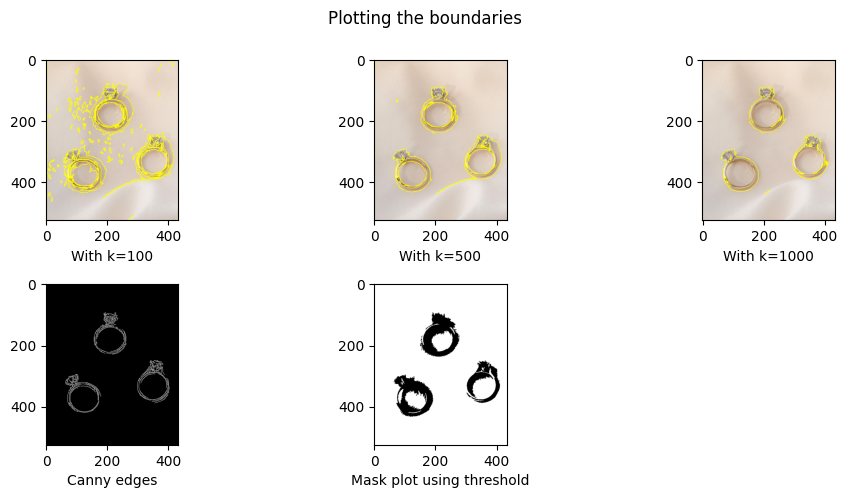

In [12]:
img=io.imread(data_path+"/"+"s1.PNG")

img_rgb= color.rgba2rgb(img)

img_gray= color.rgb2gray(img_rgb)
threshold = filters.threshold_otsu(img_gray)
mask = img_gray > threshold
mask_ = morphology.remove_small_objects(mask, 50)
mask_ = morphology.remove_small_holes(mask_, 50)
print(mask.shape)

labels = measure.label(mask)

res1 = felzenszwalb(img_rgb, scale=100)
res2 = felzenszwalb(img_rgb, scale=500)
res3 = felzenszwalb(img_rgb, scale=1000)

# canny edge detection
edges = cv2.Canny(img,100,200)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax1.imshow(mark_boundaries(img_rgb, res1)); ax1.set_xlabel("With k=100")
ax2.imshow(mark_boundaries(img_rgb, res2)); ax2.set_xlabel("With k=500")
ax3.imshow(mark_boundaries(img_rgb, res3)); ax3.set_xlabel("With k=1000")

ax4.imshow(edges,cmap = 'gray'); ax4.set_xlabel("Canny edges")

ax5.imshow(mask_,cmap = 'gray'); ax5.set_xlabel("Mask plot using threshold")

fig.subplots_adjust(hspace=0.4)
fig.suptitle("Plotting the boundaries")


In [16]:

label_image = label(res3)
properties=['label','area','area_bbox','bbox','centroid','coords','eccentricity','major_axis_length', 'minor_axis_length','area_filled']
df_prop = pd.DataFrame(regionprops_table(res3,properties=properties))
df_prop['area_ratio']=df_prop['area_bbox']/(img_gray.shape[0]*img_gray.shape[1])
df_prop['area_percent']=df_prop['area_ratio']*100


(525, 433, 4)


In [ ]:
df_prop=df_prop[df_prop['area_percent']>5]
fig=plt.figure(figsize=(12,5))
for ind in range(len(df_prop)):
  if df_prop.iloc[ind]['bbox-2']<img_gray.shape[1] and df_prop.iloc[ind]['bbox-3']<img_gray.shape[0]:
    crop= img[df_prop.iloc[ind]['bbox-0']:df_prop.iloc[ind]['bbox-2'],df_prop.iloc[ind]['bbox-1']:df_prop.iloc[ind]['bbox-3']]
    num=int('23{0}'.format(ind))
    ax=fig.add_subplot(num)
    ax.imshow(crop)
plt.show()

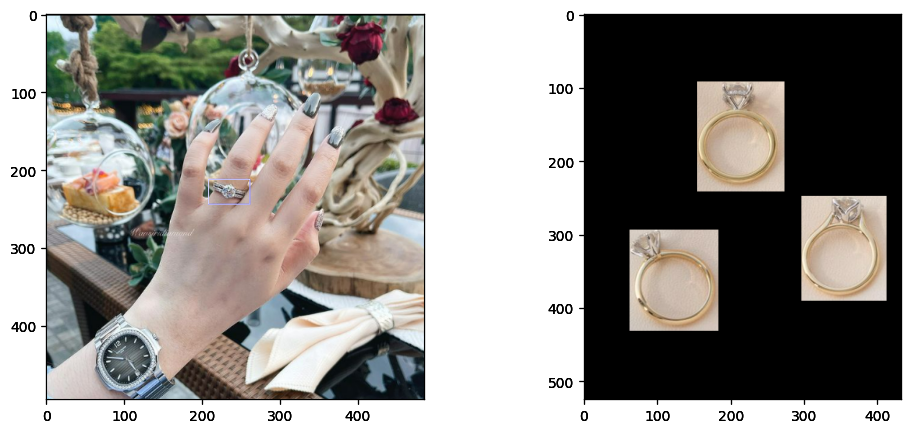

In [123]:
df_prop=df_prop[df_prop['area_percent']>5]
fig=plt.figure(figsize=(12,5))
mask= np.zeros_like(img_rgb)
img_=img_rgb.copy()
for ind in range(len(df_prop)):
  if df_prop.iloc[ind]['bbox-2']<img_gray.shape[1] and df_prop.iloc[ind]['bbox-3']<img_gray.shape[0]:
    x1=df_prop.iloc[ind]['bbox-0']
    y1=df_prop.iloc[ind]['bbox-1']
    x2=df_prop.iloc[ind]['bbox-2']
    y2=df_prop.iloc[ind]['bbox-3']
    crop= img[x1:x2,y1:y2]
    mask[x1:x2,y1:y2]  = img_[x1:x2,y1:y2]
    # num=int('23{0}'.format(ind))
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122)

    ax1.imshow(img)
    ax2.imshow(mask)

plt.show()

In [41]:
crop1=img[df_prop.iloc[1]['bbox-0']:df_prop.iloc[1]['bbox-2'],df_prop.iloc[1]['bbox-1']:df_prop.iloc[1]['bbox-3']]
crop2=img[df_prop.iloc[2]['bbox-0']:df_prop.iloc[2]['bbox-2'],df_prop.iloc[2]['bbox-1']:df_prop.iloc[2]['bbox-3']]
crop3=img[df_prop.iloc[3]['bbox-0']:df_prop.iloc[3]['bbox-2'],df_prop.iloc[3]['bbox-1']:df_prop.iloc[3]['bbox-3']]


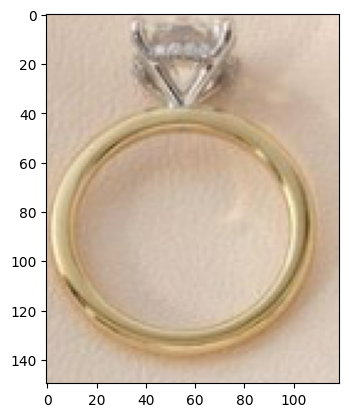

In [47]:
plt.imshow(crop1)
plt.show()

**Edge Detection:**

1.Apply edge detection on the grayscale image to identify the region of interest i.e., rings in the image using the canny edge detector.

2.Vary the parameters passed to the edge detection and observe the variation in the results.

3.Display the edge detection results


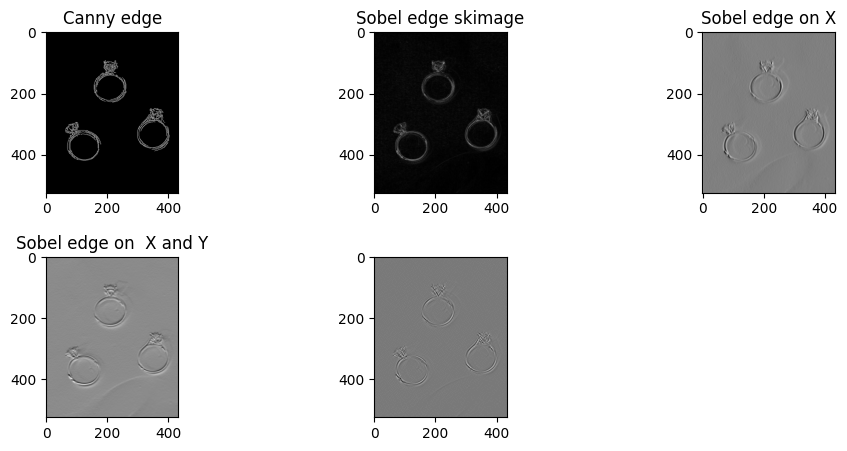

In [79]:
# Edge Detection

img_blur = cv2.GaussianBlur(img_gray, (1,1), 0)
smoothed_image = filters.gaussian(img_blur, sigma=1)

# Canny Edge Detection
edges = cv2.Canny(image=img, threshold1=100, threshold2=200) # Canny Edge Detection

# Sobel Edge Detection
# sobelx = cv2.Sobel(src=smoothed_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobel_ski = sobel(img_gray) # Sobel Edge Detection skimage
sobelx = cv2.Sobel(src=smoothed_image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=smoothed_image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=smoothed_image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Sobel Edge Detection on  X and Y
# Display Sobel Edge Detection Images
fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(231)
ax2=fig.add_subplot(232)
ax3=fig.add_subplot(233)
ax4=fig.add_subplot(234)
ax5=fig.add_subplot(235)


ax1.imshow(edges,cmap = 'gray'); ax1.set_title("Canny edge")
ax2.imshow(sobel_ski,cmap = 'gray'); ax2.set_title("Sobel edge skimage")
ax3.imshow(sobelx,cmap = 'gray'); ax3.set_title("Sobel edge on X")
ax4.imshow(sobely,cmap = 'gray'); ax4.set_title("Sobel edge on  Y")
ax5.imshow(sobelxy,cmap = 'gray'); ax4.set_title("Sobel edge on  X and Y")

fig.subplots_adjust(hspace=0.4)
plt.show()




**Image Segmentation**

1. Apply different segmentation algorithms such as Felsenszwalb, Slic, Quickshift, Watershed, etc. from skimage package on the s1.png image.

2. Vary the parameters passed to the segmentation method and observe the variation in the results.

3. Display the segmented image output.

4. Create a mask based on the segments identified and lay it on top of the original image and display the result.


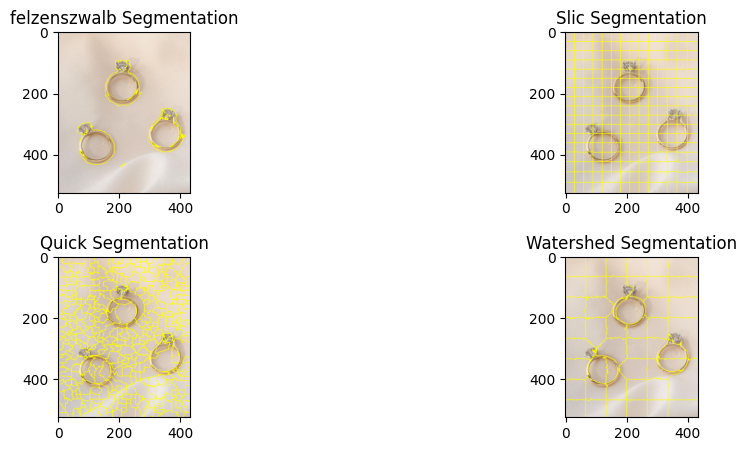

In [71]:
# Image Segmentation Techniques:

img_fz = felzenszwalb(img, scale=1000)
img_slic = slic(img, n_segments=250, compactness=100, sigma=1,
                     start_label=1)
img_quick = quickshift(img_rgb, kernel_size=3, max_dist=16, ratio=0.5)
gradient = sobel(img_gray)
img_watershed = watershed(gradient, markers=50, compactness=0.001)

fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)


ax1.imshow(mark_boundaries(img_rgb, img_fz)); ax1.set_title("felzenszwalb Segmentation")
ax2.imshow(mark_boundaries(img_rgb, img_slic)); ax2.set_title("Slic Segmentation")
ax3.imshow(mark_boundaries(img_rgb, img_quick),cmap = 'gray'); ax3.set_title("Quick Segmentation")
ax4.imshow(mark_boundaries(img_rgb, img_watershed),cmap = 'gray'); ax4.set_title("Watershed Segmentation")
fig.subplots_adjust(hspace=0.4)
plt.show()

**Histogram Analysis**

Observe the RGB values of different ring colors (Silver, Platinum, Gold) and utilize color based conditions to identify rings in images.

The histograms of the images in R, G, B can be plotted to identify range of values


Text(0, 0.5, 'Pixel count')

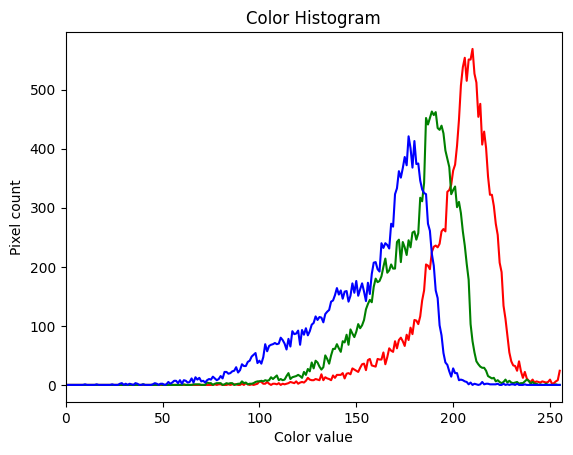

In [82]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        crop1[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

In [141]:
def histogram_plot(crop,img_fel):
  # tuple to select colors of each channel line
  colors = ("red", "green", "blue")

  # create the histogram plot, with three lines, one for
  # each color
  fig=plt.figure(figsize=(12,5))
  ax1=fig.add_subplot(141)
  ax1.imshow(crop)
  crop_rgb=color.rgba2rgb(crop)

  ax2=fig.add_subplot(142)
  for channel_id, color_ in enumerate(colors):
      histogram, bin_edges = np.histogram(
          crop[:, :, channel_id], bins=256, range=(0, 256)
      )
      ax2.plot(bin_edges[0:-1], histogram, color=color_)

  ax2.set_title("Color Histogram")
  ax2.set_xlabel("Color value")
  ax2.set_ylabel("Pixel count")
  ax3=fig.add_subplot(143)


  # print("*************** ",crop_rgb.shape)
  ax3.imshow(mark_boundaries(crop_rgb,img_fel))

  # edges = cv2.Canny(image=crop_rgb, threshold1=100, threshold2=200)
  edges = feature.canny(color.rgb2gray(crop_rgb))
  ax4=fig.add_subplot(144)
  ax4.imshow(edges)
  fig1=plt.figure()#figsize=(12,5))
  ax1=fig1.add_subplot(141)
  img_closed=morphology.area_closing(edges, 32, connectivity=1)
  img_dilated=morphology.binary_dilation(img_closed)
  img_dilated=morphology.binary_dilation(img_dilated)
  img_close=morphology.diameter_closing(img_dilated, 3, connectivity=1)
  # mask = np.array(img_close.convert('L'), dtype = np.float32) # Mask should be Grayscale so each value is either 0 or 255
  img_close[img_close == 255.0] = 1.0
  mask2 = np.stack((img_close,)*3, axis=-1)
  # crop_rgb = crop_rgb /255
  # blended2 = np.clip(crop_rgb+mask2, 0, 1)
  blended2=crop_rgb*mask2
  # new_crop = crop_rgb*img_close
  # ax1.imshow(img_close, cmap=plt.cm.gray)
  ax1.imshow(blended2)

  ax22=fig1.add_subplot(142)

  # img_fill_holes = skimage.ndimage.binary_fill_holes(blended2[:,:,0]).astype(int)
  imgg=morphology.binary_closing(img_close)
  # imgg=morphology.flood(imgg, (1, 1),  connectivity=1)
  # imgg=morphology.isotropic_dilation(imgg,1)
  imgg = np.stack((imgg,)*3, axis=-1)
  imgg=crop_rgb*imgg
  ax22.imshow(imgg)
  # ax22.imshow(imgg)
  contours = measure.find_contours(img_closed,0.8) #fully_connected
  # imgg=crop_rgb*imgg
  # ax3=fig1.add_subplot(143)


  # contours, _ = cv2.findContours(img_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  # print(img_closed.shape)
  # mask_1=np.zeros_like(crop_rgb)
  # image_coordinates = []
  # for contour in contours:
  #   Xmin = int(np.min(contour[:,0]))
  #   Xmax = int(np.max(contour[:,0]))
  #   Ymin = int(np.min(contour[:,1]))
  #   Ymax = int(np.max(contour[:,1]))
  #   # print(Xmin,Xmax, Ymin,Ymax)
  #   mask_1[Xmin:Xmax, Ymin:Ymax ]=crop_rgb[Xmin:Xmax, Ymin:Ymax ]

  # # for n, contour in enumerate(contours):
  # #   ax2.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2, cmap=plt.cm.gray)
  # # for contour in contours:
  # #     x, y, w, h = cv2.boundingRect(contour)
  # #     image_coordinates.append((x, y, w+x, h+y))
  # #     mask_1[x:w+x, y:y+h]=crop_rgb[x:w+x, y:y+h]
  # ax2.imshow(imgg)
  plt.show()
  # fig2=plt.figure()
  # imgg_=imgg.copy()
  # for channel_id, color_ in enumerate(colors):
  #     histogram, bin_edges = np.histogram(
  #         imgg[:, :, channel_id], bins=256, range=(0, 256)
  #     )
  #     plt.plot(bin_edges[0:-1], histogram, color=color_)

  # # plt.set_title("Color Histogram")
  # # plt.set_xlabel("Color value")
  # # plt.set_ylabel("Pixel count")
  # plt.show()
  # print(imgg_.getpixel(1,1))
  # print(imgg.getcolors(max_colors))
  hist_plot(imgg)

def hist_plot(image):
  # image = skimage.data.chelsea()
  image_red, image_green, image_blue = image[:,:,0], image[:,:,1], image[:,:,2]

  fig, ax = plt.subplots(2,3)
  ax[0,0].imshow(image_red, cmap='gray')
  ax[0,1].imshow(image_green, cmap='gray')
  ax[0,2].imshow(image_blue, cmap='gray')

  bins = np.arange(-0.5, 255+1,1)
  ax[1,0].hist(image_red.flatten(), bins = bins, color='r')
  ax[1,1].hist(image_green.flatten(), bins=bins, color='g')
  ax[1,2].hist(image_blue.flatten(), bins=bins, color='b')
  hist_red = np.histogram(image_red.flatten(), bins=bins)
  hist_green = np.histogram(image_green.flatten(), bins=bins)
  hist_blue = np.histogram(image_blue.flatten(), bins=bins)

  print(image.shape,hist_red[0].argmax(),
        hist_green[0].argmax(),
        hist_blue[0].argmax())

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: RuntimeWarning: Got image with third dimension of 4. This image will be interpreted as a multichannel 2d image, which may not be intended.
  return func(*args, **kwargs)


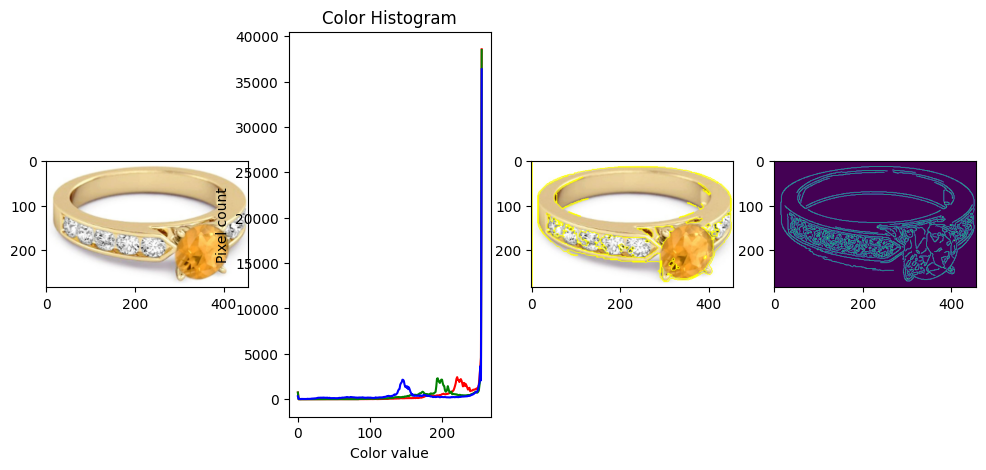

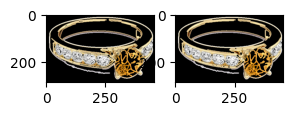

(285, 456, 3) 0 0 0


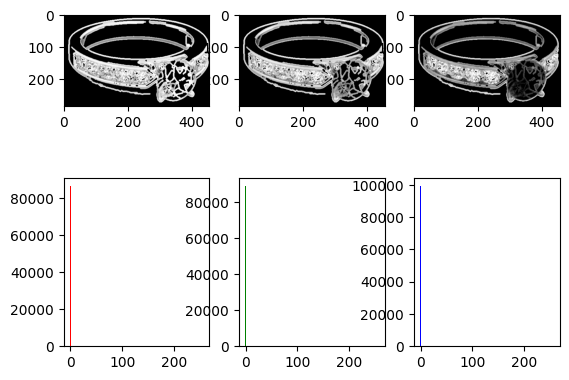

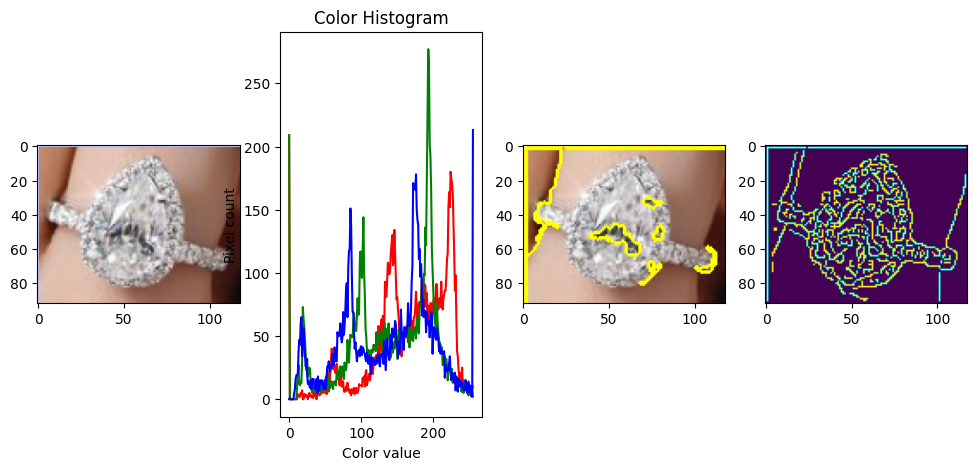

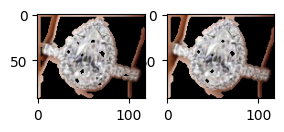

(92, 118, 3) 1 0 0


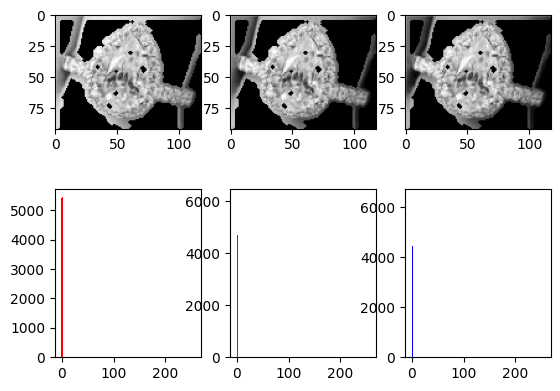

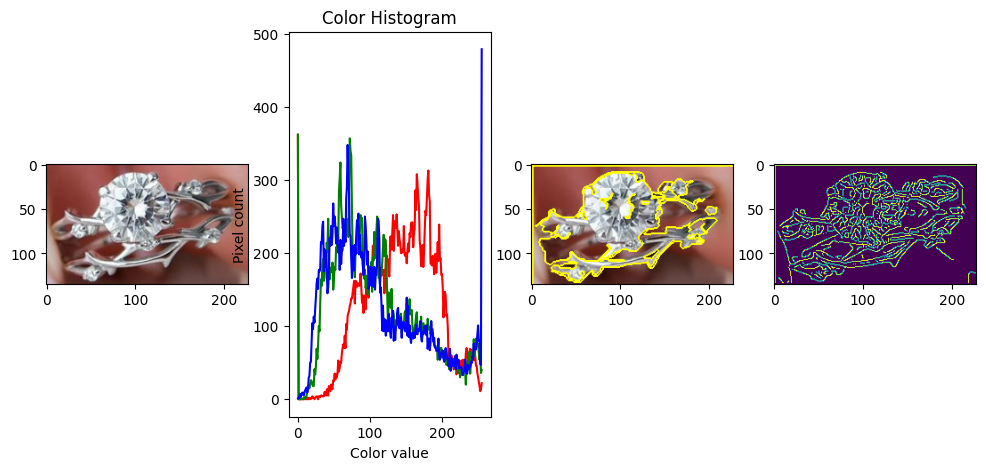

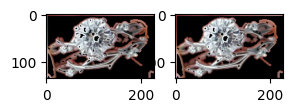

(135, 228, 3) 0 0 0


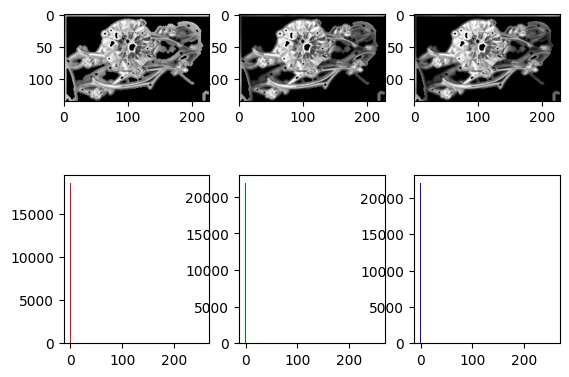

In [142]:
data_path = "/content/drive/MyDrive/Jahnavi Jaddi/Week 1/Ring_sample_data"
count=1
for images in os.listdir(data_path):
  if (images.endswith(".PNG")):
        # print(images)
        img=io.imread(data_path+"/"+images)
        file=data_path+"/"+images.replace("PNG","txt")
        fl = open(file, 'r')
        data = fl.readlines()
        fl.close()
        dh, dw, _ = img.shape
        for dt in data:

            # Split string to float
            _, x, y, w, h = map(float, dt.split(' '))

            l = int((x - w / 2) * dw)
            r = int((x + w / 2) * dw)
            t = int((y - h / 2) * dh)
            b = int((y + h / 2) * dh)

            if l < 0:
                l = 0
            if r > dw - 1:
                r = dw - 1
            if t < 0:
                t = 0
            if b > dh - 1:
                b = dh - 1

            cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)
            if images in ("s32.PNG","s13.PNG","s49.PNG"):
              crop=img[t:b,l:r]
              img_fel=felzenszwalb(crop, scale=1000)
              histogram_plot(crop,img_fel)

